# TP1
## Integrantes:
    * Federico Hosen LU: 825/12
    * Martín Fosco LU: 449/13
    * Javier Minces LU: 231/13

### Imports y carga del archivo con los datos

In [56]:
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt
    import scipy.stats
    import random

    f1 = open("tiempo.txt")
    next(f1)
    rawData = np.loadtxt(f1)


### Gráfico con datos originales

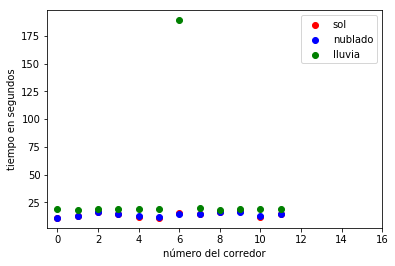

In [57]:
colors = ["red", "blue", "green"]
labels = ["sol", "nublado", "lluvia"]
for col in range(1,len(rawData[0])):
    plt.scatter(range(len(rawData[:,col])), rawData[:,col], color=colors[col-1], label = labels[col-1])
plt.ylabel("tiempo en segundos")
plt.xlabel("número del corredor")
plt.legend()
plt.xlim(-0.5, 16)
plt.show()

### Corrección de datos y gráfico con datos corregidos
Notamos que en la séptima entrada de los datos, se encuentra un outlier, __189__ es el tiempo que tarda el corredor 7 en lluvia. Sin embargo el mínimo y el máximo son __18.2__ y __19.9__ respectivamente; por esto creemos que el dato en cuestión fue un error humano al momento de la carga (*se omitió la coma*). Dado que contamos con pocos datos, decidimos corregirlo agregando la *coma faltante* y usar el dato en su totalidad (*toda la fila*) en contraposicón a desecharlo.

In [58]:
    f2 = open("tiempo-corregido.txt")
    next(f2)
    data = np.loadtxt(f2)

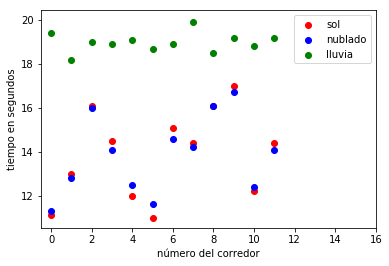

In [59]:
colors = ["red", "blue", "green"]
labels = ["sol", "nublado", "lluvia"]
for col in range(1,len(data[0])):
    plt.scatter(range(len(data[:,col])), data[:,col], color=colors[col-1], label = labels[col-1])
plt.ylabel("tiempo en segundos")
plt.xlabel("número del corredor")
plt.legend()
plt.xlim(-0.5, 16)
plt.show()

In [60]:
print("Media Sol: ", np.mean(data[:,1]))
print("Media Nublado: ", np.mean(data[:,2]))
print("Media Lluvia: ",np.mean(data[:,3]))

Media Sol:  13.9083333333
Media Nublado:  13.8666666667
Media Lluvia:  18.9833333333


### Un primer acercamiento
Primeramente, notamos que después de la corrección los datos parecen tener más sentido en su totalidad; sin el outlier/error en el gráfico ya podemos empezar a analizarlos.

Observamos dos cosas:
 * Parecería haber una dependencia entre los tiempos en sol, y nublados.
 * Los tiempos en lluvia se mueven en el mismo rango de valores para todos los corredores, y no parece guardar relación con los tiempos en sol o nublados.

### 1. Test de correlación de Pearson.

Ya mencionamos que al observar los datos sospechamos que hay una fuerte relación entre los tiempos de sol y nublado, y también que ésta relación no parece estar entre nublado/sol y lluvia.

Éstas serán nuestras dos hipótesis, y nos parece adecuado utilizar el test de correlación de Pearson para ver si los resultados de dicho test las refutan.

#### Resultados:
Coeficiente de correlación de Pearson entre *sol* y *lluvia*. 

In [61]:
print (np.corrcoef(data[:,1], data[:,3])[0][1])

0.0525893206142


Coeficiente de correlación de Pearson entre *nublado* y *lluvia*.

In [62]:
print (np.corrcoef(data[:,2], data[:,3])[0][1])

0.0422890660248


Coeficiente de correlación de Pearson entre *sol* y *nublado*.

In [63]:
print (np.corrcoef(data[:,1], data[:,2])[0][1])

0.990823776756


#### Conclusión
Tanto el coeficiente de sol con lluvia, y nublado con lluvia están muy cercanos a 0. De estos resultados interpretamos que dichos datos se condicen con nuestra primer hipótesis.

Por otro lado, el nivel de relación entre sol y nublado parece ser muy alto, pues el valor del coeficiente es muy cercano a 1.


## 2. Tests de apareamiento

### A. Primer test
A partir de los datos que se observan, sospechamos que los corredores tardan lo mismo en correr tanto en días nublados como en días soleados. Dicho ésto, consideramos la hipótesis de que las muestras de sol y nublado tienen una media similar. Dada las características de la muestra estamos en condiciones de realizar el test de apareamiento.

In [64]:
print (scipy.stats.ttest_rel(data[:,1], data[:,2]))

Ttest_relResult(statistic=0.41213824986058739, pvalue=0.68815561156045579)


#### Conclusión
Dado que el pvalor es bastante alto, no podemos rechazar la hipótesis.

### B. Segundo test
Para reforzar nuestra hipótesis de que hay poca relación entre los tiempos de sol/nublado y lluvia vamos a suponer lo contrario, vamos a suponer que la media de ambos tipos de día están relacionados y realizar un test de apareamiento.

In [65]:
print (scipy.stats.ttest_rel(data[:,1], data[:,3]))
print (scipy.stats.ttest_rel(data[:,2], data[:,3]))

Ttest_relResult(statistic=-8.576227572594302, pvalue=3.3516511607218045e-06)
Ttest_relResult(statistic=-9.7201289951570811, pvalue=9.8103994928779318e-07)


#### Conclusión
Dado que el p-valor se encuentra considerablemente por debajo del umbral típico adoptado (0.05) en ambos casos, estamos en condiciones de rechazar la hipótesis nula, es decir, que tienen una media similar.

## 3. Test de permutaciones

Notamos, además, que la velocidad de los atletas en días de lluvia parece mantenerse relativamente baja más allá del atleta que se esté evaluando.

Podríamos formular la hipótesis de que la velocidad de los atletas en días de lluvia no está relacionada con la velocidad de los atletas en otras condiciones (nublado/sol).

In [66]:
datos = data[:,1] + data[:,3]
labels = ["sol"]*len(data[:,1]) + ["lluvia"]*len(data[:,3])

delta0 = np.mean(data[:,1]) - np.mean(data[:,3])
deltas = [delta0]
for i in range(99999):
    random.shuffle(labels)
    meanSol = np.mean([datos[i] for i in range(len(datos)) if labels[i] == "sol"])
    meanLluvia = np.mean([datos[i] for i in range(len(datos)) if labels[i] != "sol"])
    deltas.append(meanSol - meanLluvia)


delta0:  -5.075


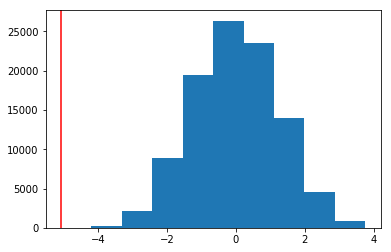

p: 1e-05


In [71]:
print("delta0: ",delta0)
plt.hist(deltas)
plt.axvline(delta0, color='r')
plt.show()

print("p:", len([delta for delta in deltas if delta <= delta0])/len(deltas))

El histograma representa la diferencia de las medias distribuyendo aleatoriamente las etiquetas de día nublado y soleado. La línea roja es el delta<sub>0</sub>

#### Conclusiones

Por lo que vemos, la probabilidad de que la muestra original provenga de una distribución aleatoria es bastante baja; en consecuencia, no podemos rechazar la hipótesis.

## 4. Test de medias independientes

In [68]:
print(scipy.stats.ttest_ind(data[:,1], data[:,3]))

Ttest_indResult(statistic=-8.4828396056353661, pvalue=2.2013598111131482e-08)


### Conclusión
Como el p-valor es extremadamente bajo, podemos decir que las medias de tiempos de lluvia y sol son distintas.

## Conclusiones generales

A continuación vamos contestar acerca de las conclusiones propuestas por el enunciado si consideramos que se pueden extraer o rechazar a partir de los datos.

#### Los atletas son más lentos en dı́as de lluvia que en dı́as soleados.

Creemos que esta conclusión se puede extraer de los datos. En principio, al observar los datos se observa que los tiempos de lluvia están por encima del resto. Basándonos en los tests, en __4.__ vimos que las medias son distintas, además la media de sol calculada de los datos es significativamente menor a la media de lluvia, con lo cual podemos concluir que __los atletas son mas lentos en días de lluvia que en días soleados.__

#### El cielo nublado no influye en los tiempos de los atletas.

En principio vimos en __2.A__ que las medias son similares, y además las muestras están corrrelacionadas por el test de correlación de Pearson. Por lo tanto podemos observar que los tiempos de los atletas, en general, no parecen ser afectados por el clima nublado.

#### La velocidad en días de lluvia es independiente del atleta.

Ésto se puede extraer directamente del test __3.__ .

#### El clima influye en la velocidad de los atletas.
Para analizar esta conclusión deberíamos hacer una diferenciación: no influye de la misma forma que esté nublado o que esté lloviendo.

Dicho esto, como vimos en las conclusiones anteriores, __los atletas son mas lentos en días de lluvia que en días soleados__ y además __el cielo nublado no influye en los tiempos de los atletas__, luego es verdad que __el clima influye en la velocidad de los atletas__.


### Consejos al entrenador:
Consideramos que con los datos actuales no es posible contestar la pregunta de quién tiene razón, pues no tenemos datos que relacionen el entrenamiento bajo lluvia de un corredor con su performance en la pista. Desconocemos el impacto que tienen.

Para dirimir la cuestión, proponemos el siguiente experimento:
Los corredores entrenan para mejorar sus tiempos en general (sin importar la condición climática).
Se propone el siguiente experimento para medir el impacto del entrenamiento bajo lluvia en la performance en la pista:
   * Se toman dos grupos de corredores, A y B.
   * Se toman muestras como las expuestas en el enunciado (sol, nublado y lluvia).
   * El grupo A se entrenará mucho bajo lluvia, mientras que el grupo B hará el entrenamiento habitual.
   * Luego de un tiempo adecuado se volverán a tomar muestras.

De los resultados nos interesará analizar cuánto mejoró cada grupo en los tiempos de sol. Si el grupo A muestra una mejoría mayor (de forma significativa) entonces el entrenador tendrá razón y si no se muestra una mejora significativa, entonces los corredores tendrán razón.